In [1]:
import pandas as pd

In [11]:
# import orca
# import os; os.chdir('../')
# import warnings; warnings.simplefilter('ignore')
# from scripts import datasources, models, variables
from synthpop.census_helpers import Census
%matplotlib inline

In [2]:
hh_synth = pd.read_csv('/home/data/fall_2018/households_v2.csv', index_col='household_id')
per_synth = pd.read_csv('/home/data/fall_2018/persons_v2.csv', index_col='person_id')

/home/max/anaconda3/envs/ual-model/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
hh_synth['persons'].sum()

7060806

In [4]:
len(per_synth)

7059885

In [9]:
merged = pd.merge(hh_synth, pd.DataFrame(per_synth.groupby('household_id').size(), columns=['person_records']), left_index=True, right_index=True)

Text(0,0.5,'persons.groupby("household_id").size()')

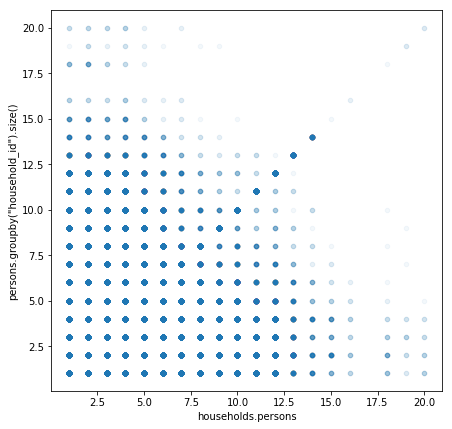

In [18]:
ax = merged.plot('persons', 'person_records', kind='scatter', alpha=0.05, figsize=(7,7))
ax.set_xlabel('households.persons')
ax.set_ylabel('persons.groupby("household_id").size()')

In [19]:
merged['pct_diff_persons'] = (merged['persons'] - merged['person_records']) / merged['persons']

Text(0.5,0,'% diff: households.persons vs. persons.groupby("household_id").size() ')

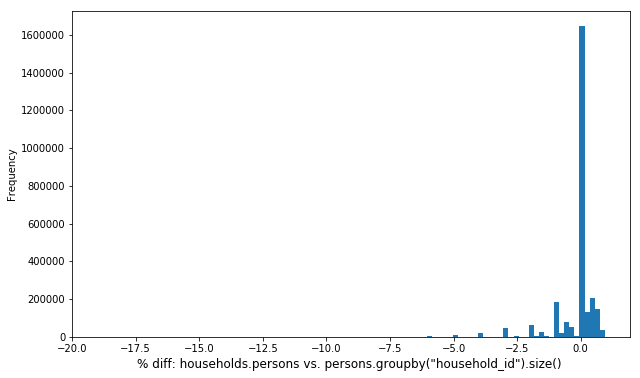

In [28]:
ax = merged['pct_diff_persons'].plot(kind='hist', bins=100, figsize=(10,6))
ax.set_xlabel('% diff: households.persons vs. persons.groupby("household_id").size() ', fontsize=12)

In [4]:
c = Census('181ed8c64531c167176365d52ac460d969d54cf2')

In [ ]:
pop = c.download_population_pums('06')
# hh_pums = c.download_household_pums('06')

/home/max/anaconda3/envs/ual-model/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
hh_merged = pd.merge(hh_pums, hh_synth, on='serialno', suffixes=('_pums','_synth'))

In [17]:
len(hh_merged) == len(hh_synth) == len(hh_merged[hh_merged['NP'] == hh_merged['persons']])

True

In [18]:
per_synth = pd.read_csv('/home/data/fall_2018/persons_v2.csv', index_col='person_id')

/home/max/anaconda3/envs/ual-model/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [19]:
synth_merged = pd.merge(per_synth, hh_synth, left_on='household_id', right_index=True)

In [22]:
len(synth_merged[synth_merged['member_id'] > synth_merged['persons']])

1051405

In [23]:
per_synth['member_id'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  7.,  6.,  9.,  8., 10., 12., 13., 14.,
       11., 15., 18., 16., 17., 19., 20.])

In [24]:
hh_pums['NP'].unique()

array([ 2,  5,  8,  1,  3,  0,  4,  6,  7,  9, 20, 10, 11, 12, 13, 16, 15,
       14, 19, 17, 18])